In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
import sys
sys.path.append("../")

from src.domain_shift_diagnosis.datasets.source_data import SourceDataSampler

## Source data generator

In this notebook, you will find an example of usage of our Source Data Generator. It uses a latent factors model with sparse linear interactions between the factors and the observable features.
### The `SourceDataSampler` object

In [54]:
sampler = SourceDataSampler(
    n_observable=8, # Number of observable features
    n_latent=3, # Number of latent factors
    sparsity_intensity=1,
    random_state=3
)

### Binary Interactions Mapping matrix and  Loading Matrix

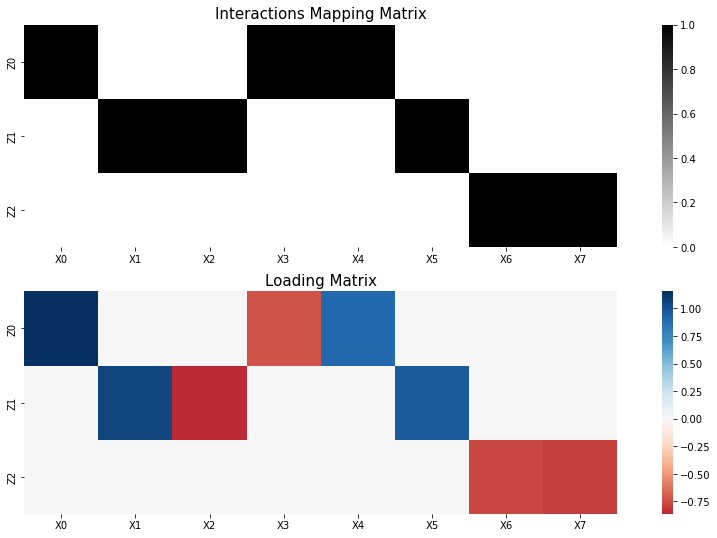

In [55]:
fig = plt.figure(figsize=(16, 9))
ax1 = fig.add_subplot(211)
sns.heatmap(sampler.W, cmap="binary", square=True)
ax1.title.set_text('Interactions Mapping Matrix')
ax1.title.set_fontsize(15)
ax2 = fig.add_subplot(212)
sns.heatmap(sampler.C, cmap="RdBu", center=0, square=True)
ax2.title.set_text('Loading Matrix')
ax2.title.set_fontsize(15)

### Sampling from the true latent factors distribution


$Z \sim \mathcal{N}(0, 1)$\
$X_{noisy} = Z C + \mathcal{N}(0, \sigma_{noise})$


In [61]:
Z, X, X_noisy = sampler.sample(n_samples=100, gaussian_noise_std=0.5)

#### Covariance matrix of $Z$

<AxesSubplot:>

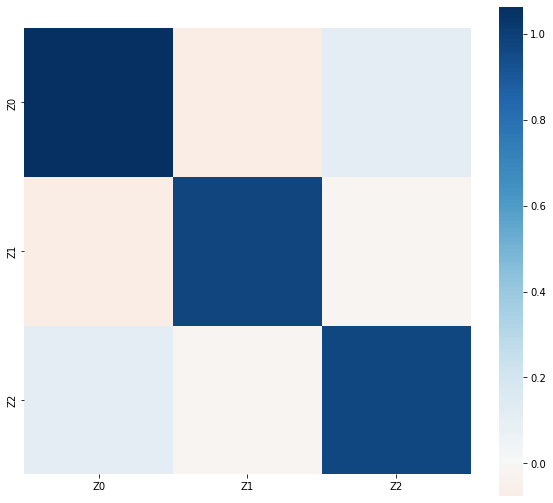

In [62]:
fig = plt.figure(figsize=(10, 9))
sns.heatmap(
    Z.cov(), cmap="RdBu", center=0, square=True
)

#### Covariance matrix of $X_{noisy}$

<AxesSubplot:>

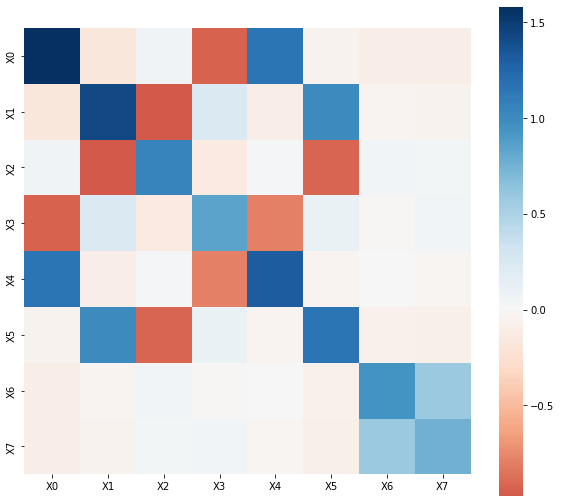

In [63]:
fig = plt.figure(figsize=(10, 9))
sns.heatmap(
    X_noisy.cov(), cmap="RdBu", center=0, square=True
)

### Visualization of the pairwise interactions between observable features

<Figure size 720x720 with 0 Axes>

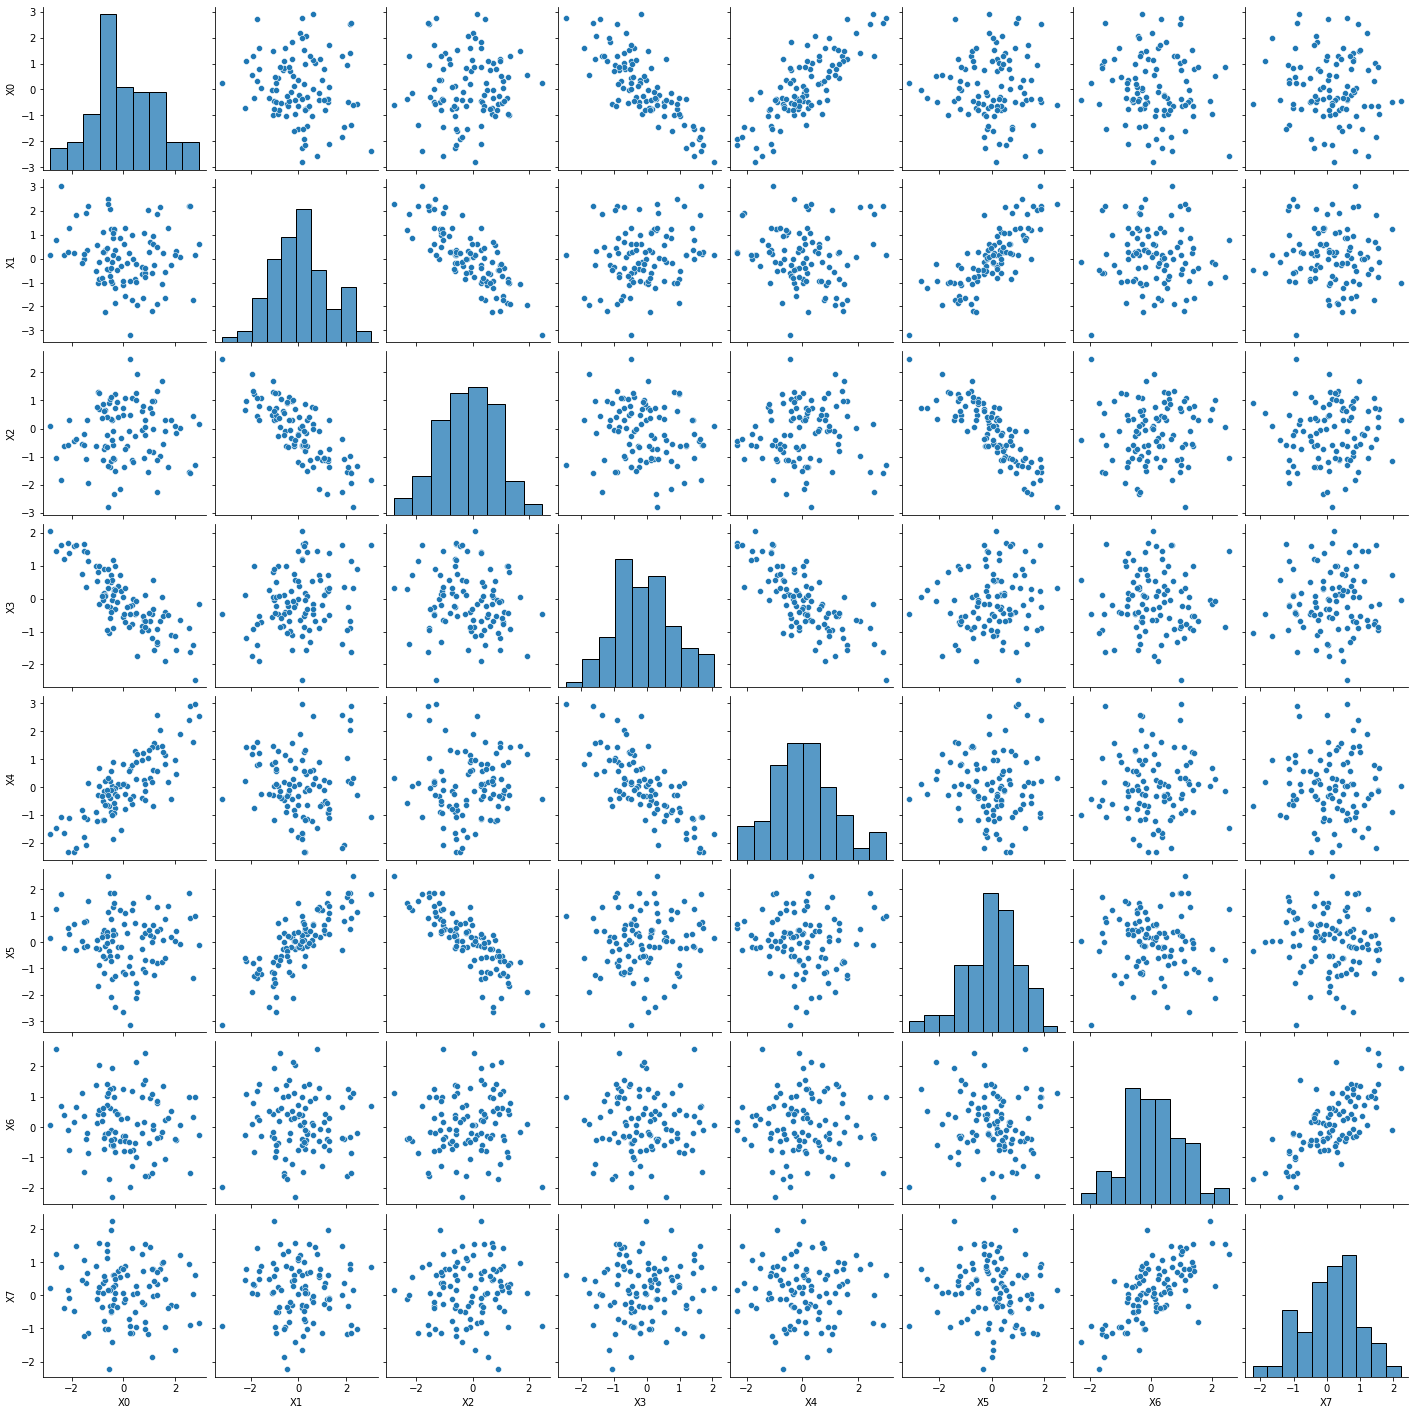

In [64]:
plt.figure(figsize=(10, 10))
sns.pairplot(X_noisy)